In [1]:
# --- Manejo de datos ---
import pandas as pd
import numpy as np

# --- Visualización ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Preprocesamiento ---
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# --- Modelado (Clasificación y Clustering) ---
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# --- Evaluación de modelos ---
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# --- Configuración general ---
pd.set_option('display.max_columns', None)

# --- Suprimir advertencias ---
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\saray\OneDrive\Documentos\proyectos_portfolio\3_experimento_chicago\data\crime_chicago.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8316829 entries, 0 to 8316828
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [4]:
df.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13311263,JG503434,07/29/2022 03:39:00 AM,023XX S TROY ST,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,False,1033,10.0,25.0,30.0,17,NaN,NaN,2022,04/18/2024 03:40:59 PM,NaN,NaN,NaN
1,13053066,JG103252,01/03/2023 04:44:00 PM,039XX W WASHINGTON BLVD,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,1122,11.0,28.0,26.0,18,NaN,NaN,2023,01/20/2024 03:41:12 PM,NaN,NaN,NaN


In [5]:
df.tail(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
8316827,13838008,JJ256744,05/02/2025 12:23:00 PM,026XX S Emerald Ave,0820,THEFT,$500 AND UNDER,RESIDENCE - YARD (FRONT / BACK),False,False,914,9.0,11.0,60.0,06,1171739.0,1886866.0,2025,05/18/2025 03:40:55 PM,41.845019,-87.645230,"(41.845018557, -87.645229684)"
8316828,13838122,JJ257861,05/01/2025 12:00:00 PM,055XX S CORNELL AVE,1120,DECEPTIVE PRACTICE,FORGERY,GOVERNMENT BUILDING / PROPERTY,False,False,235,2.0,5.0,41.0,10,1188201.0,1868688.0,2025,05/18/2025 03:40:55 PM,41.794759,-87.585398,"(41.794759204, -87.585397931)"


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     14322
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614823
Community Area          613450
FBI Code                     0
X Coordinate             92860
Y Coordinate             92860
Year                         0
Updated On                   0
Latitude                 92860
Longitude                92860
Location                 92860
dtype: int64

TTO dates

In [8]:
df['Date'].head()

0    07/29/2022 03:39:00 AM
1    01/03/2023 04:44:00 PM
2    08/26/2017 10:00:00 AM
3    09/06/2023 05:00:00 PM
4    09/06/2023 11:00:00 AM
Name: Date, dtype: object

In [9]:
# Convert the 'Date' and 'Updated On' columns into date and time format, if they're not already in that format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Updated On'] = pd.to_datetime(df['Updated On'], errors='coerce')

# Create a new column with just the date (no time) from the 'Date' column
df['Date_only'] = df['Date'].dt.date

# Create a new column with just the time (no date) from the 'Date' column
df['Time_only'] = df['Date'].dt.strftime('%H:%M:%S')

# Create a new column with just the date (no time) from the 'Updated On' column
df['Updated_on_only'] = df['Updated On'].dt.date

# Create a new column with just the time (no date) from the 'Updated On' column
df['Updated_on_time_only'] = df['Updated On'].dt.strftime('%H:%M:%S')

# Show the first few rows with the new columns
print(df[['Date', 'Date_only', 'Time_only', 'Updated On', 'Updated_on_only', 'Updated_on_time_only']].head())


                 Date   Date_only Time_only          Updated On  \
0 2022-07-29 03:39:00  2022-07-29  03:39:00 2024-04-18 15:40:59   
1 2023-01-03 16:44:00  2023-01-03  16:44:00 2024-01-20 15:41:12   
2 2017-08-26 10:00:00  2017-08-26  10:00:00 2018-02-11 15:57:41   
3 2023-09-06 17:00:00  2023-09-06  17:00:00 2023-11-04 15:40:18   
4 2023-09-06 11:00:00  2023-09-06  11:00:00 2023-11-04 15:40:18   

  Updated_on_only Updated_on_time_only  
0      2024-04-18             15:40:59  
1      2024-01-20             15:41:12  
2      2018-02-11             15:57:41  
3      2023-11-04             15:40:18  
4      2023-11-04             15:40:18  


In [10]:
df['Case Number'].value_counts()

Case Number
HJ590004    6
HZ140230    6
JE266473    5
JC470284    5
HS256531    5
           ..
JJ257558    1
JJ257360    1
JJ257584    1
JJ257587    1
JG177593    1
Name: count, Length: 8316236, dtype: int64

In [11]:
df['Location Description'].fillna(df['Location Description'].mode()[0], inplace=True)

In [12]:
df.dropna(subset=['District'], inplace=True)

In [13]:
df['Ward'].fillna(df['Ward'].mode()[0], inplace=True)


In [14]:
df['Community Area'].fillna(df['Community Area'].mode()[0], inplace=True)

In [15]:
df['X Coordinate'].fillna(df['X Coordinate'].median(), inplace=True)
df['Y Coordinate'].fillna(df['Y Coordinate'].median(), inplace=True)
df['Latitude'].fillna(df['Latitude'].median(), inplace=True)
df['Longitude'].fillna(df['Longitude'].median(), inplace=True)

In [16]:
df.drop(columns=['Location'], inplace=True)
df.drop(columns=['Date'], inplace=True)
df.drop(columns=['Updated On'], inplace=True)

# Convert column names to snake_case format

In [17]:
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

In [18]:
df2=df.copy()

In [19]:
df2.isnull().sum()

id                      0
case_number             0
block                   0
iucr                    0
primary_type            0
description             0
location_description    0
arrest                  0
domestic                0
beat                    0
district                0
ward                    0
community_area          0
fbi_code                0
x_coordinate            0
y_coordinate            0
year                    0
latitude                0
longitude               0
date_only               0
time_only               0
updated_on_only         0
updated_on_time_only    0
dtype: int64

# Univariate Analysis

In [ ]:
for i in df2.columns:
    print('\n',i,df2[i].unique(),'\n')

In [21]:
for i in df2.columns:
    print('\n',i,df2[i].value_counts(),'\n')


 id id
13838122    1
13311263    1
13053066    1
11227634    1
13203321    1
           ..
11662417    1
6680276     1
6438609     1
6272641     1
6255892     1
Name: count, Length: 8316782, dtype: int64 


 case_number case_number
HJ590004    6
HZ140230    6
JE266473    5
JC470284    5
HS256531    5
           ..
JJ257558    1
JJ257360    1
JJ257584    1
JJ257587    1
JG184406    1
Name: count, Length: 8316189, dtype: int64 


 block block
100XX W OHARE ST        16874
001XX N STATE ST        16731
076XX S CICERO AVE      10677
0000X N STATE ST        10022
008XX N MICHIGAN AVE     9690
                        ...  
002XX N Wells st            1
026XX S Emerald Ave         1
058XX S Artesian ave        1
002XX W Illinois ST         1
026XX N St Louis Ave        1
Name: count, Length: 65050, dtype: int64 


 iucr iucr
0820    669370
0486    649708
0460    593991
0810    452427
1320    449673
         ...  
9901         1
1624         1
1521         1
1633         1
1145         1
Name

In [22]:
df2.describe()

,id,beat,district,ward,community_area,x_coordinate,y_coordinate,year,latitude,longitude
count,8.316782e+06,8.316782e+06,8.316782e+06,8.316782e+06,8.316782e+06,8.316782e+06,8.316782e+06,8.316782e+06,8.316782e+06,8.316782e+06
mean,7.434818e+06,1.184081e+03,1.129775e+01,2.316771e+01,3.648317e+01,1.164658e+06,1.885952e+06,2.010827e+03,4.184265e+01,-8.767128e+01
std,3.735356e+06,7.036538e+02,6.962133e+00,1.340488e+01,2.098951e+01,1.686719e+04,3.226760e+04,6.938866e+00,8.877950e-02,6.112074e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,4.012970e+06,6.210000e+02,6.000000e+00,1.100000e+01,2.400000e+01,1.153216e+06,1.859357e+06,2.005000e+03,4.176945e+01,-8.771275e+01
50%,7.434106e+06,1.034000e+03,1.000000e+01,2.400000e+01,3.000000e+01,1.166183e+06,1.890983e+06,2.010000e+03,4.185642e+01,-8.766562e+01
75%,1.078613e+07,1.731000e+03,1.700000e+01,3.200000e+01,5.300000e+01,1.176352e+06,1.909100e+06,2.016000e+03,4.190641e+01,-8.762833e+01
max,1.383939e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.025000e+03,4.202291e+01,-8.752453e+01


# Separating Variables into Categorical, Boolean, and Numeric


In [23]:
def get_variable_lists(dataset):
    numeric_list = []
    boolean_list = []
    categorical_list = []
    
    for column in dataset:
        # Numeric variables (except binary ones)
        if (dataset[column].dtype.kind == "f" or dataset[column].dtype.kind == "i") and len(dataset[column].unique()) != 2:
            numeric_list.append(column)
        
        # Boolean variables (binary)
        elif dataset[column].dtype == "bool":  # Change here to detect the 'bool' type
            boolean_list.append(column)
        
        # Categorical variables (strings or categories)
        elif dataset[column].dtype.kind == "O":
            categorical_list.append(column)
    
    return numeric_list, boolean_list, categorical_list

# Call the function
numerics, booleans, categoricals = get_variable_lists(df2)

# Print the lists obtained
print("Numeric variables:", numerics)
print("Boolean variables:", booleans)
print("Categorical variables:", categoricals)



Numeric variables: ['id', 'beat', 'district', 'ward', 'community_area', 'x_coordinate', 'y_coordinate', 'year', 'latitude', 'longitude']
Boolean variables: ['arrest', 'domestic']
Categorical variables: ['case_number', 'block', 'iucr', 'primary_type', 'description', 'location_description', 'fbi_code', 'date_only', 'time_only', 'updated_on_only', 'updated_on_time_only']


Data distribution 

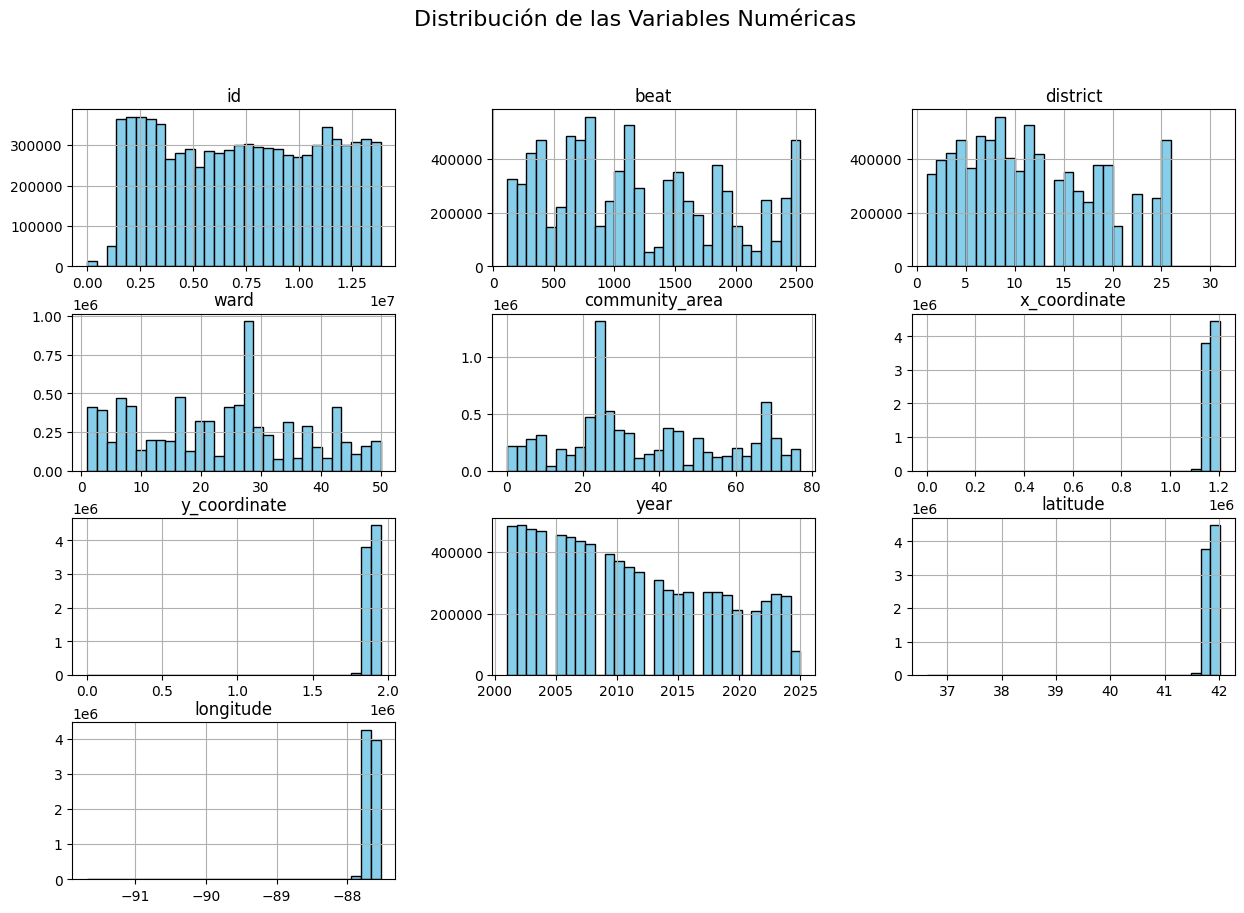

In [24]:
df2[numerics].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribución de las Variables Numéricas', fontsize=16)
plt.show()

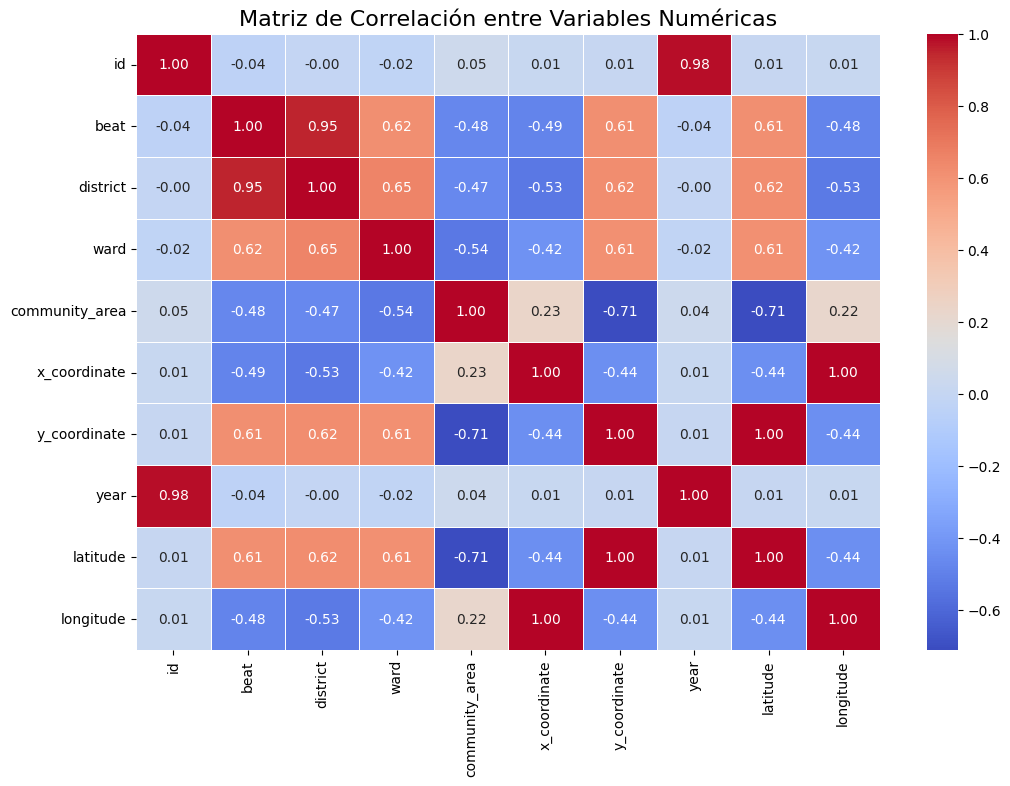

In [25]:
# Calcular la matriz de correlación
correlation_matrix = df2[numerics].corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.show()


# Step-by-Step Code for Boxplot Detection:



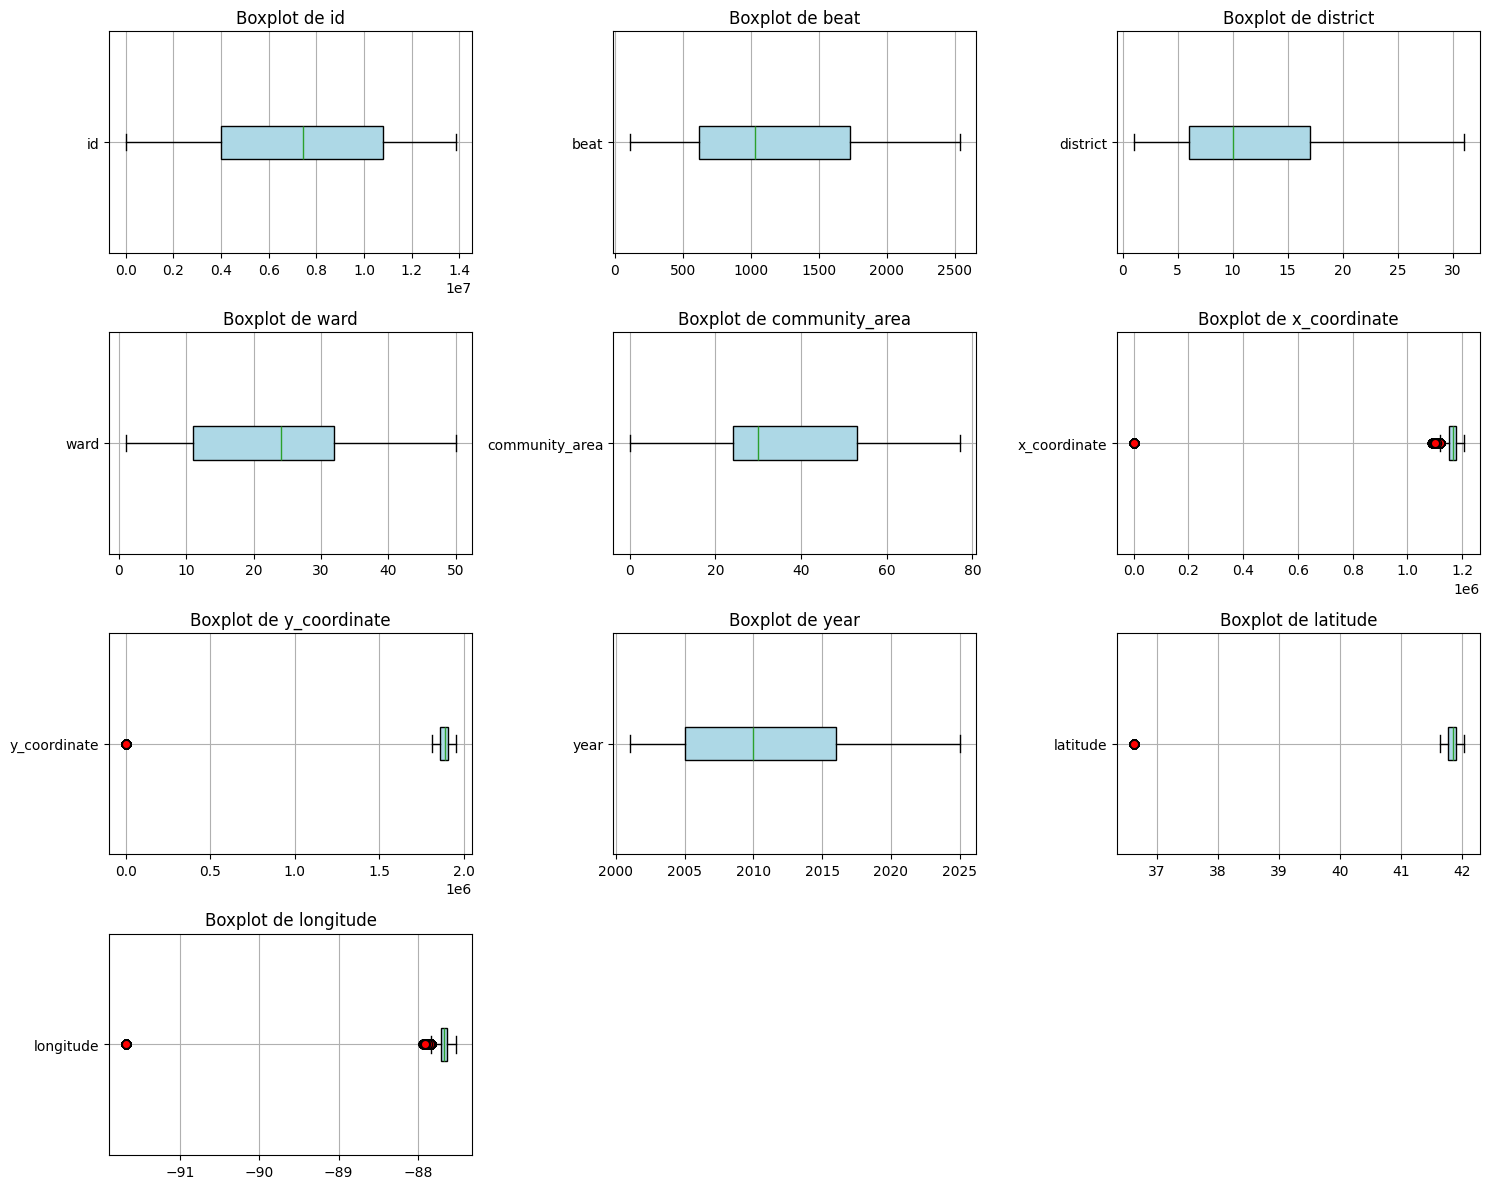

In [26]:

plt.figure(figsize=(15, 12))  
for i, col in enumerate(numerics, 1):
    plt.subplot(4, 3, i)  
    df2.boxplot(column=col, vert=False, patch_artist=True, 
                boxprops=dict(facecolor='lightblue', color='black'), 
                whiskerprops=dict(color='black'), capprops=dict(color='black'), 
                flierprops=dict(markerfacecolor='red', marker='o'))
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


In [27]:
print(booleans)

['arrest', 'domestic']


In [28]:
# Convertir variables booleanas a 0 y 1
df2[booleans] = df2[booleans].astype(int)

# Verificar los primeros valores
print(df2[booleans].head())


   arrest  domestic
0       1         0
1       1         0
2       0         0
3       0         0
4       0         0


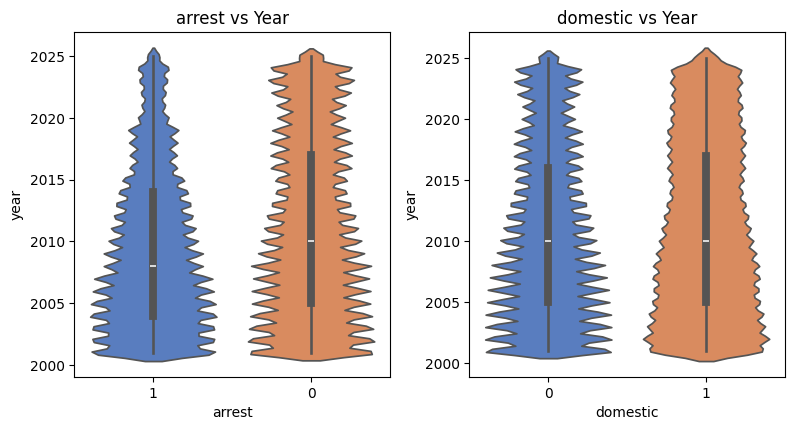

In [29]:
# Violin plot for each boolean variable with respect to 'Year'
plt.figure(figsize=(12, 8))


for i, col in enumerate(booleans, 1):
    plt.subplot(2, 3, i)  
    sns.violinplot(x=df2[col].astype(str), y=df2['year'], palette="muted")
    plt.title(f'{col} vs Year')
    plt.xlabel(col)
    plt.ylabel('year')

plt.tight_layout()
plt.show()



case_number
HJ590004    6
HZ140230    6
JE266473    5
JC470284    5
HS256531    5
HP296582    5
HS496074    4
HJ104730    4
HZ554936    4
HN217726    4
Name: count, dtype: int64


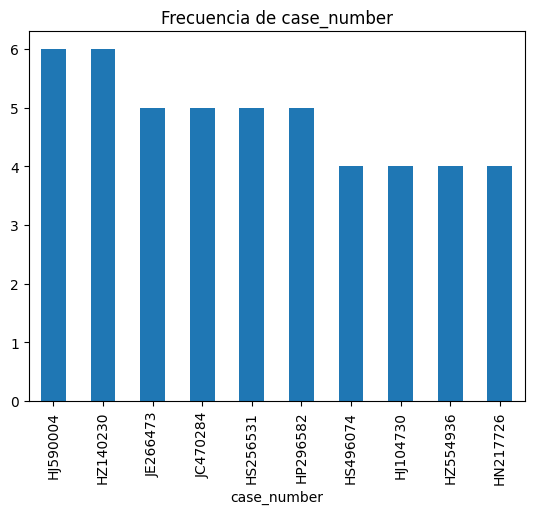

block
100XX W OHARE ST                       16874
001XX N STATE ST                       16731
076XX S CICERO AVE                     10677
0000X N STATE ST                       10022
008XX N MICHIGAN AVE                    9690
0000X W TERMINAL ST                     7543
064XX S DR MARTIN LUTHER KING JR DR     6377
063XX S DR MARTIN LUTHER KING JR DR     5880
023XX S STATE ST                        5324
001XX W 87TH ST                         4885
Name: count, dtype: int64


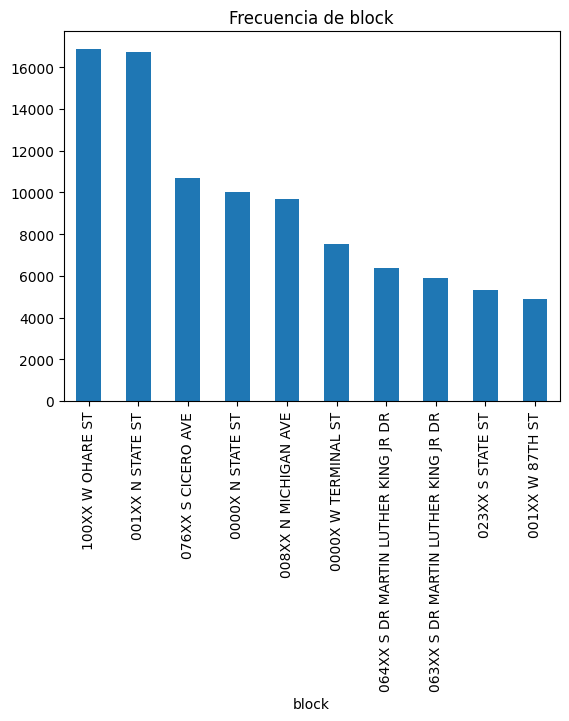

iucr
0820    669370
0486    649708
0460    593991
0810    452427
1320    449673
1310    434789
0560    378130
0910    331216
0610    292650
1811    279718
Name: count, dtype: int64


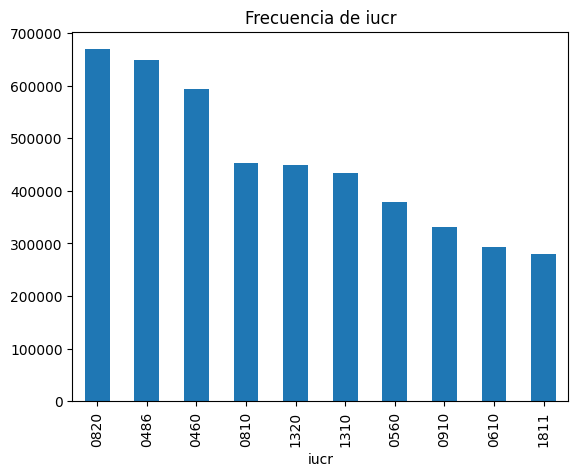

primary_type
THEFT                  1763501
BATTERY                1515233
CRIMINAL DAMAGE         945912
NARCOTICS               760775
ASSAULT                 554437
OTHER OFFENSE           518206
BURGLARY                440837
MOTOR VEHICLE THEFT     423066
DECEPTIVE PRACTICE      381009
ROBBERY                 311846
Name: count, dtype: int64


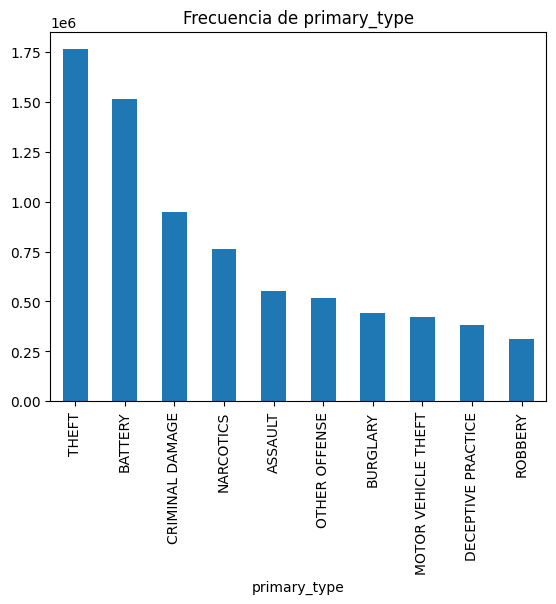

description
SIMPLE                          976666
$500 AND UNDER                  669354
DOMESTIC BATTERY SIMPLE         649708
TO VEHICLE                      465784
OVER $500                       452414
TO PROPERTY                     434789
AUTOMOBILE                      331216
FORCIBLE ENTRY                  292650
POSS: CANNABIS 30GMS OR LESS    278135
FROM BUILDING                   265633
Name: count, dtype: int64


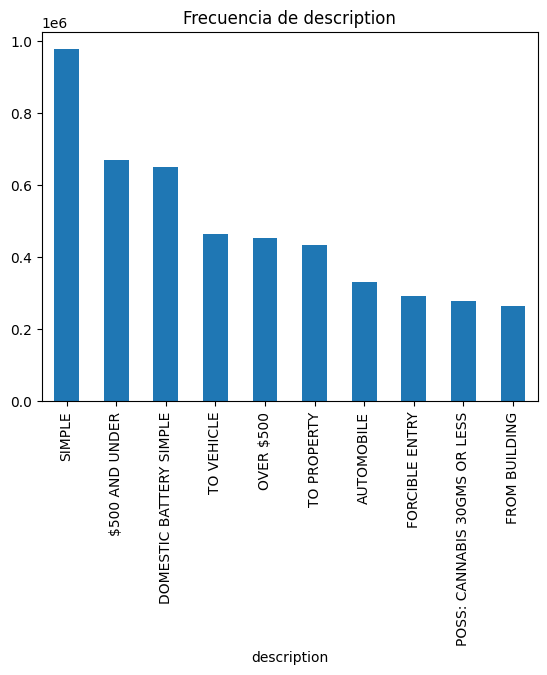

location_description
STREET                            2186761
RESIDENCE                         1370566
APARTMENT                          980969
SIDEWALK                           756373
OTHER                              269956
PARKING LOT/GARAGE(NON.RESID.)     202936
ALLEY                              185080
SMALL RETAIL STORE                 165544
SCHOOL, PUBLIC, BUILDING           146370
RESTAURANT                         139295
Name: count, dtype: int64


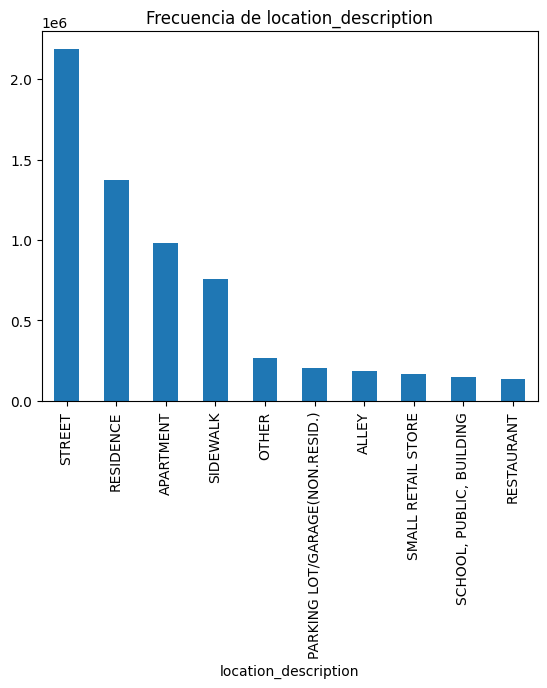

fbi_code
06     1764927
08B    1288393
14      945912
26      799371
18      717312
05      439411
08A     429685
07      423066
11      328958
03      311846
Name: count, dtype: int64


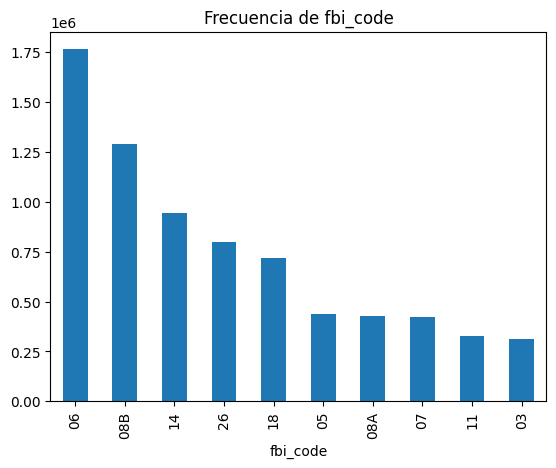

date_only
2003-01-01    2035
2005-01-01    1979
2007-01-01    1968
2006-01-01    1920
2020-05-31    1900
2004-01-01    1898
2002-01-01    1874
2009-01-01    1845
2008-01-01    1835
2001-01-01    1831
Name: count, dtype: int64


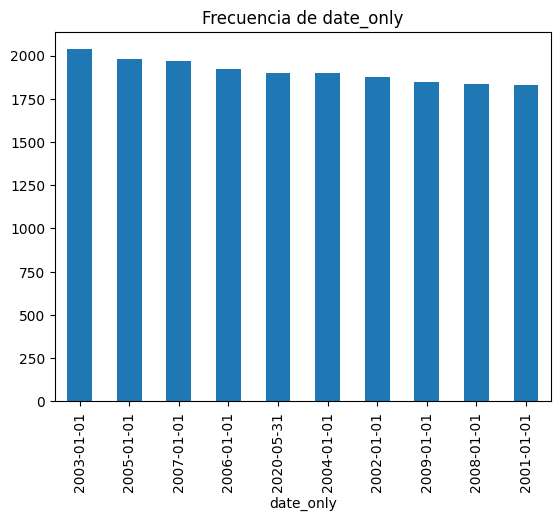

time_only
12:00:00    196011
09:00:00    172237
00:00:00    159822
18:00:00    150809
22:00:00    148771
15:00:00    145538
20:00:00    142348
17:00:00    142020
19:00:00    140629
21:00:00    138478
Name: count, dtype: int64


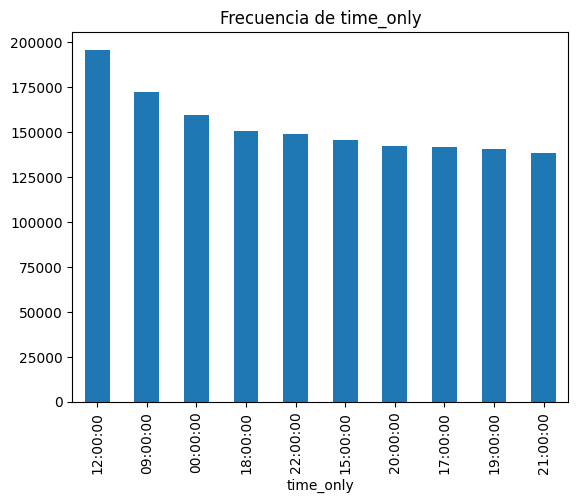

updated_on_only
2018-02-10    2703915
2018-02-28    2646487
2015-08-17     507060
2016-02-04     340527
2021-09-07     256315
2025-05-17     245245
2023-01-03     227515
2023-08-19     153909
2024-12-21      97400
2018-05-04      82443
Name: count, dtype: int64


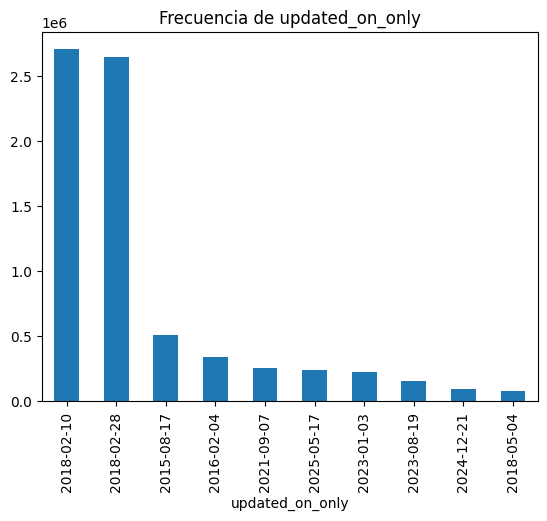

updated_on_time_only
15:50:01    2703910
15:56:25    2646464
15:03:40     507060
06:33:39     340519
15:41:02     259099
15:40:52     248040
15:40:27     229689
15:40:26     156228
15:40:46     101013
15:51:04      81938
Name: count, dtype: int64


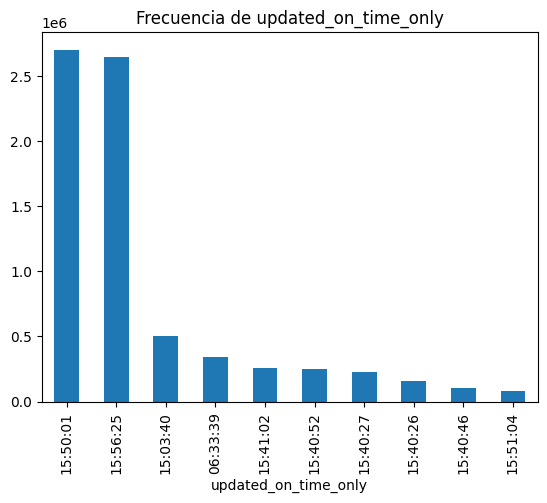

In [30]:
for col in categoricals:
    print(df2[col].value_counts().head(10))
    df2[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Frecuencia de {col}')
    plt.show()

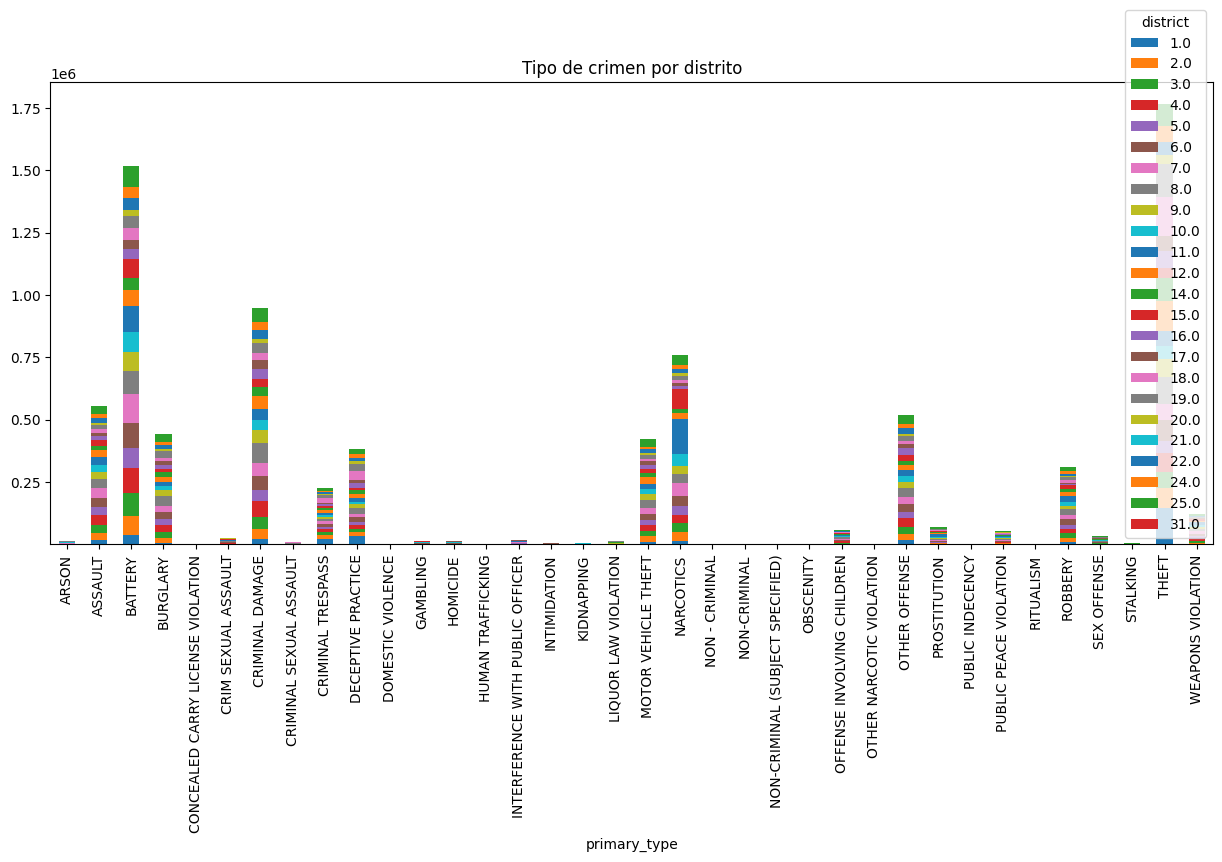

In [31]:
pd.crosstab(df2['primary_type'], df2['district']).plot(kind='bar', stacked=True, figsize=(15,6))
plt.title('Tipo de crimen por distrito')
plt.show()

Análisis temporal


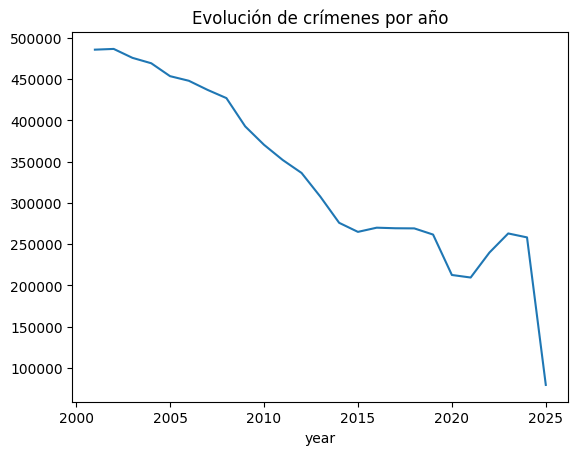

In [32]:
df2.groupby('year').size().plot(kind='line')
plt.title('Evolución de crímenes por año')
plt.show()

# TTO Outliers

Chicago se encuentra en la latitud 41.85003 y longitud -87.65005. En este sentido comenzaremos a limpiar las variables de coordenadas

¿Qué son X Coordinate y Y Coordinate?
Estas coordenadas se usan en mapas cartográficos para ubicaciones más precisas dentro de un sistema de referencia proyectado, típicamente:

Sistema de referencia: Illinois State Plane NAD83 o similar, en pies o metros.

X Coordinate = distancia este-oeste (easting)

Y Coordinate = distancia norte-sur (northing)

🧭 ¿Cómo se usan?
Estas variables son útiles para análisis espaciales más precisos que requieren proyecciones planas (como mapas de calor, análisis de densidad, o para construir polígonos).

Funcionan mejor cuando usas bibliotecas como GeoPandas, Shapely o herramientas SIG (como QGIS o ArcGIS).

In [33]:
from scipy.stats import zscore

# 1Calcular el Z-Score para cada variable geográfica
df['lat_z'] = zscore(df['latitude'])
df['lon_z'] = zscore(df['longitude'])
df['x_z'] = zscore(df['x_coordinate'])
df['y_z'] = zscore(df['y_coordinate'])

df['outlier'] = (
    (df['lat_z'].abs() > 3) | 
    (df['lon_z'].abs() > 3) |
    (df['x_z'].abs() > 3) |
    (df['y_z'].abs() > 3)
)
print(f"Total de outliers: {df['outlier'].sum()}")

Total de outliers: 32877


In [34]:
df_clean = df[~df['outlier']].copy()

# Eliminar las columnas auxiliares (Z-Score y 'outlier')
df_clean.drop(columns=['lat_z', 'lon_z', 'x_z', 'y_z', 'outlier'], inplace=True)

print("Registros después de eliminar outliers:", df_clean.shape[0])

Registros después de eliminar outliers: 8283905


Filtro rango valido 

In [35]:
LAT_MIN = 41.60
LAT_MAX = 42.10
LON_MIN = -87.80
LON_MAX = -87.50
# Filtrar por rango válido para la ciudad de Chicago
df2_clean = df_clean[
    (df_clean['latitude'] >= 41.60) & (df_clean['latitude'] <= 42.10) &
    (df_clean['longitude'] >= -87.80) & (df_clean['longitude'] <= -87.50)
].copy()

print("Registros después del filtro geográfico estricto:", df_clean.shape[0])

Registros después del filtro geográfico estricto: 8283905


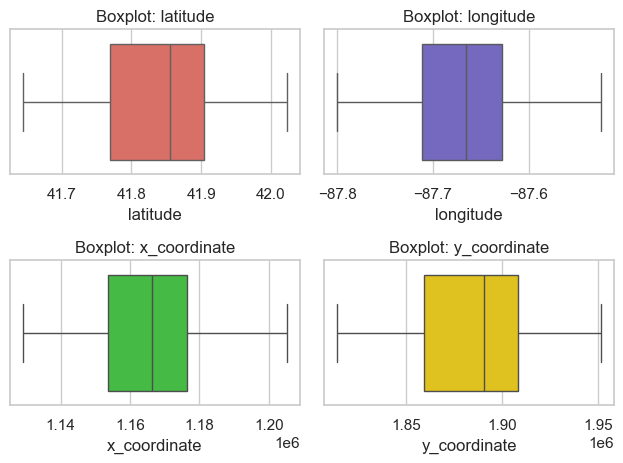

In [36]:
sns.set(style="whitegrid")

variables_geo = ['latitude', 'longitude', 'x_coordinate', 'y_coordinate']

colores = ["#EB6054", '#6A5ACD', '#32CD32', '#FFD700']

for i, col in enumerate(variables_geo, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df2_clean[col], color=colores[i-1])  
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()

plt.show()

In [40]:
df_clean.isnull().sum()

id                      0
case_number             0
block                   0
iucr                    0
primary_type            0
description             0
location_description    0
arrest                  0
domestic                0
beat                    0
district                0
ward                    0
community_area          0
fbi_code                0
x_coordinate            0
y_coordinate            0
year                    0
latitude                0
longitude               0
date_only               0
time_only               0
updated_on_only         0
updated_on_time_only    0
dtype: int64

In [38]:
import os

os.makedirs("data", exist_ok=True)


In [39]:
pd.to_pickle(df2, "data/df_EDA.pkl")

<!-- Análisis temporal -->
